In [1]:
import sys
import math
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression #회귀분석모델 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split


pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [15, 10]
np.set_printoptions(precision=3)

plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [2]:
df = pd.read_csv('./NHIS_OPEN_GJ_2017_100.csv',encoding='EUC-KR')
df1 = pd.read_csv('./NHIS_OPEN_GJ_2018_100.csv')
df = df.append([df1])
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.00000,1.00000,1.00000,1.00000,1.00000,120.00000,80.00000,99.00000,193.00000,92.00000,48.00000,126.00000,17.10000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000,1,nan,nan,nan,nan,1.00000,20181126
1,2017,2,1,7,11,180,80,89.00000,0.90000,1.20000,1.00000,1.00000,130.00000,82.00000,106.00000,228.00000,121.00000,55.00000,148.00000,15.80000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000,1,nan,nan,nan,nan,2.00000,20181126
2,2017,3,1,9,41,165,75,91.00000,1.20000,1.50000,1.00000,1.00000,120.00000,70.00000,98.00000,136.00000,104.00000,41.00000,74.00000,15.80000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000,0,nan,nan,nan,nan,nan,20181126
3,2017,4,1,11,48,175,80,91.00000,1.50000,1.20000,1.00000,1.00000,145.00000,87.00000,95.00000,201.00000,106.00000,76.00000,104.00000,17.60000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000,1,nan,nan,nan,nan,0.00000,20181126
4,2017,5,1,11,30,165,60,80.00000,1.00000,1.20000,1.00000,1.00000,138.00000,82.00000,101.00000,199.00000,104.00000,61.00000,117.00000,13.80000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000,1,nan,nan,nan,nan,0.00000,20181126


In [3]:
df = df.drop(['기준년도','가입자일련번호','시도코드','데이터공개일자','시력(좌)','시력(우)','청력(좌)','청력(우)','구강검진수검여부','치아우식증유무','결손치유무','치아마모증유무','제3대구치(사랑니)이상','치석'],axis=1)
df["음주여부"] = df["음주여부"].fillna(value=0)
df = df.dropna(subset=['허리둘레','수축기혈압','이완기혈압','식전혈당(공복혈당)','요단백','음주여부','흡연상태','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']) #결측치있는행 모두제거
df


,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,8,170,75,90.00000,120.00000,80.00000,99.00000,193.00000,92.00000,48.00000,126.00000,17.10000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000
1,1,7,180,80,89.00000,130.00000,82.00000,106.00000,228.00000,121.00000,55.00000,148.00000,15.80000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000
2,1,9,165,75,91.00000,120.00000,70.00000,98.00000,136.00000,104.00000,41.00000,74.00000,15.80000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000
3,1,11,175,80,91.00000,145.00000,87.00000,95.00000,201.00000,106.00000,76.00000,104.00000,17.60000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000
4,1,11,165,60,80.00000,138.00000,82.00000,101.00000,199.00000,104.00000,61.00000,117.00000,13.80000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999978,1,8,180,65,77.00000,123.00000,89.00000,92.00000,158.00000,139.00000,70.00000,60.00000,15.90000,1.00000,1.00000,11.00000,8.00000,15.00000,3.00000,1.00000
999979,1,13,155,60,87.00000,129.00000,70.00000,82.00000,274.00000,239.00000,45.00000,181.00000,16.40000,1.00000,1.30000,65.00000,127.00000,64.00000,3.00000,1.00000
999981,2,14,155,55,83.00000,146.00000,69.00000,99.00000,216.00000,122.00000,43.00000,148.00000,12.40000,1.00000,0.70000,21.00000,15.00000,23.00000,1.00000,0.00000
999982,2,14,155,55,84.00000,130.00000,80.00000,95.00000,222.00000,173.00000,39.00000,148.00000,12.90000,1.00000,0.80000,29.00000,14.00000,19.00000,1.00000,0.00000


In [4]:
df = df.loc[df["허리둘레"] >= 40] #허리둘레 이상치 있는 행 제거
df = df.loc[df["허리둘레"] <= 140]
df['허리둘레'].value_counts().sort_index()

40.00000     2
42.00000     1
43.00000     1
48.00000     1
49.00000     1
            ..
135.00000    2
136.00000    2
136.80000    1
138.00000    1
140.00000    1
Name: 허리둘레, Length: 745, dtype: int64

In [5]:
df.isnull().sum()

성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg단위)      0
허리둘레           0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
dtype: int64

In [6]:
obesity = df[['성별코드','허리둘레']].copy() 
obesity["복부비만"] = 0
obesity.loc[(obesity['성별코드'] == 1) & (obesity['허리둘레'] >= 90),'복부비만'] = 1
obesity.loc[(obesity['성별코드'] == 2) & (obesity['허리둘레'] >= 85),'복부비만'] = 1
df["복부비만"] = obesity["복부비만"] #복부비만 컬럼 추가

weight = df[['신장(5Cm단위)', '체중(5Kg단위)']].copy()

weight['BMI'] = weight['체중(5Kg단위)'] / ( (weight['신장(5Cm단위)'] / 100) * (weight['신장(5Cm단위)']/100) )

df['BMI'] = weight['BMI'] #bmi컬럼 추가

bmi = df['BMI'].copy()
def bmi_code(x):
    if(x >= 30):
        return 2
    elif(25 <= x < 30):
        return 1
    else:
        return 0

bmi = bmi.apply(bmi_code)
df["BMI코드"] = bmi #bmi코드 컬럼 추가


blood_pressure = df[['이완기혈압', '수축기혈압']].copy()
blood_pressure["고혈압"] = 0
blood_pressure.loc[(blood_pressure['이완기혈압'] < 80),'고혈압'] = 0
blood_pressure.loc[(80 <= blood_pressure['이완기혈압']) ,'고혈압'] = 1
blood_pressure.loc[(90 <= blood_pressure['이완기혈압']) & (blood_pressure['이완기혈압'] < 100),'고혈압'] = 2
blood_pressure.loc[(blood_pressure['이완기혈압'] >= 100),'고혈압'] = 3

blood_pressure.loc[blood_pressure['수축기혈압'] < 120,'고혈압'] = 0
blood_pressure.loc[(120 <= blood_pressure['수축기혈압']) &  (blood_pressure['수축기혈압'] < 140),'고혈압'] = 1
blood_pressure.loc[(140 <= blood_pressure['수축기혈압']) &  (blood_pressure['수축기혈압'] < 160),'고혈압'] = 2
blood_pressure.loc[(blood_pressure['수축기혈압'] >= 160),'고혈압'] = 3
df["고혈압"] = blood_pressure["고혈압"] #고혈압 컬럼 추가


diabete = df["식전혈당(공복혈당)"].copy()

def is_diabete(x):
    if(x >= 126):
        return 1
    else:
        return 0

diabete = diabete.apply(is_diabete)
df["당뇨병"] = diabete #당뇨병 컬럼 추가
df = df.drop(['식전혈당(공복혈당)'],axis=1)
df.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '복부비만',
       'BMI', 'BMI코드', '고혈압', '당뇨병'],
      dtype='object')

In [7]:
array = df.values
X = array[:,0:23]
Y = array[:,23]

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
fit.scores_

array([1.064e+03, 2.499e+04, 3.397e+01, 2.104e+04, 3.710e+04, 3.616e+04,
       9.572e+03, 3.252e+04, 1.662e+06, 5.362e+04, 9.804e+04, 6.324e+02,
       2.612e+03, 3.078e+02, 1.018e+05, 2.678e+05, 1.447e+06, 1.508e+03,
       5.192e+01, 1.471e+04, 9.020e+03, 1.173e+04, 1.350e+04])

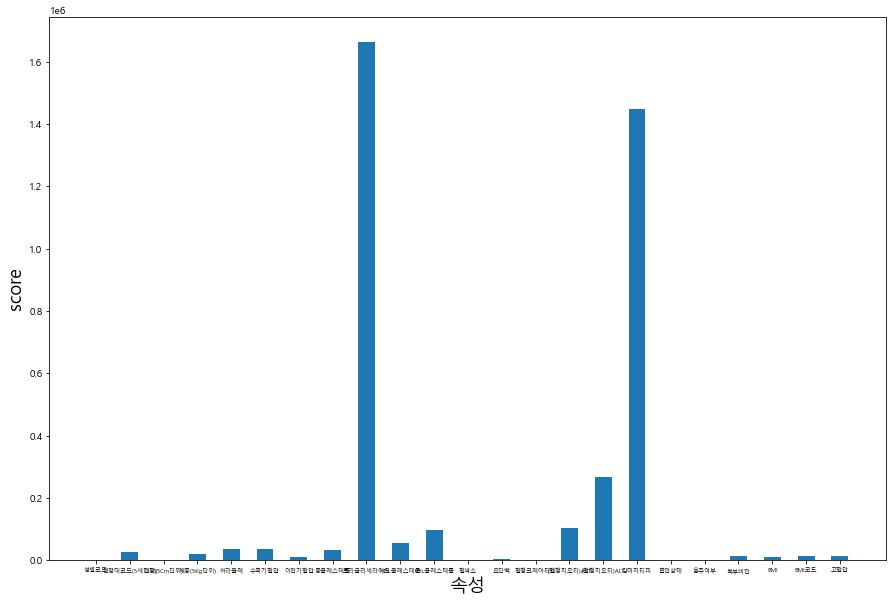

In [8]:

label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '복부비만',
       'BMI', 'BMI코드', '고혈압'])
index = np.arange(len(label))


plt.bar(index, fit.scores_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.show()

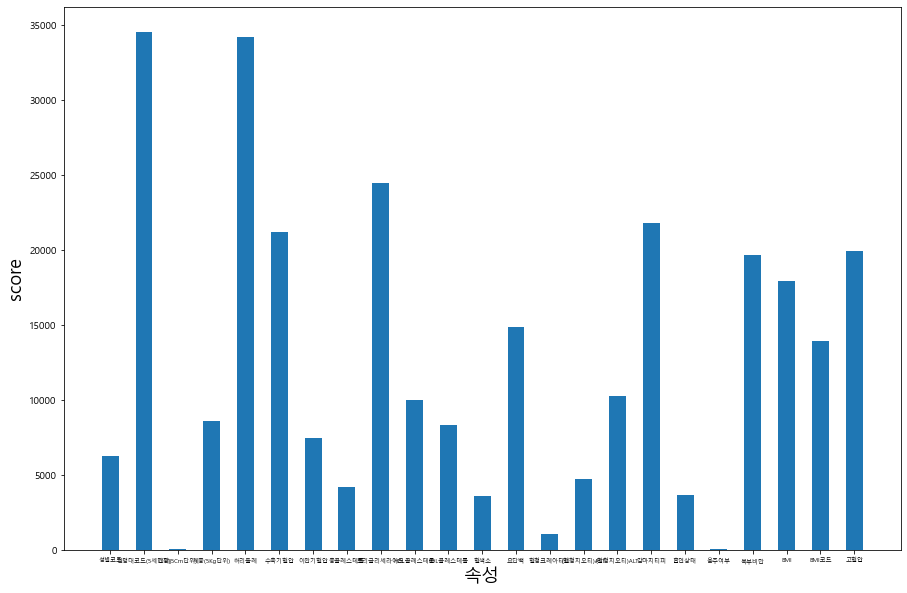

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

array = df.values
X = array[:,0:23]
Y = array[:,23]

selectK = SelectKBest(score_func=f_classif, k='all')
selectK.fit(X,Y)
selectK.scores_

label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '복부비만',
       'BMI', 'BMI코드', '고혈압'])
index = np.arange(len(label))


plt.bar(index, selectK.scores_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.show()

In [10]:
selector_GBC = SelectFromModel(estimator=GradientBoostingClassifier()).fit(x, y)

NameError: name 'SelectFromModel' is not defined

In [ ]:
train_df = df[["연령대코드(5세단위)", "허리둘레", "총콜레스테롤", "트리글리세라이드", "혈색소", "(혈청지오티)AST", "(혈청지오티)ALT","감마지티피","당뇨병"]].copy()
labels = ['정상', '당뇨']

data = train_df.drop(['당뇨병'], axis=1)
target = train_df['당뇨병']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, target, test_size=0.3, random_state=0)

model = LogisticRegression(C = 0.01, penalty = 'l2')
model.fit(X_train, y_train)
predicts = model.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, predicts)))

In [ ]:
params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

accuracy_score(y_test, lr_preds)

In [ ]:
df_clf = DecisionTreeClassifier(random_state=11)
df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
accuracy_score(y_test,pred)